In [4]:
import math
import sys
from heapq import heappop, heappush
from itertools import combinations
import time

class Graph:
    def __init__(self, V):
        self.V = V
        self.adjMatrix = [[0] * V for _ in range(V)]

    def add_edge(self, u, v, w):
        self.adjMatrix[u][v] = w
        self.adjMatrix[v][u] = w

def prim_mst(graph):
    V = graph.V
    mst = Graph(V)
    key = [float('inf')] * V
    parent = [-1] * V
    in_mst = [False] * V

    key[0] = 0.0

    for _ in range(V - 1):
        min_key = float('inf')
        u = -1

        for v in range(V):
            if not in_mst[v] and key[v] < min_key:
                min_key = key[v]
                u = v

        in_mst[u] = True

        for v in range(V):
            if graph.adjMatrix[u][v] and not in_mst[v] and graph.adjMatrix[u][v] < key[v]:
                parent[v] = u
                key[v] = graph.adjMatrix[u][v]

    mst_cost = 0.0
    for i in range(1, V):
        mst.add_edge(parent[i], i, graph.adjMatrix[parent[i]][i])
        mst_cost += graph.adjMatrix[parent[i]][i]

    return mst, mst_cost

def find_odd_degree_vertices(graph):
    odd_degree_vertices = []
    for i in range(graph.V):
        degree = sum(1 for j in range(graph.V) if graph.adjMatrix[i][j] != 0)
        if degree % 2 == 1:
            odd_degree_vertices.append(i)
    return odd_degree_vertices

def min_weight_matching(graph, odd_degree_vertices):
    matching = []
    n = len(odd_degree_vertices)
    visited = [False] * n

    for i in range(n):
        if not visited[i]:
            u = odd_degree_vertices[i]
            min_weight = float('inf')
            min_vertex = -1

            for j in range(n):
                if i != j and not visited[j] and graph.adjMatrix[u][odd_degree_vertices[j]] < min_weight:
                    min_weight = graph.adjMatrix[u][odd_degree_vertices[j]]
                    min_vertex = j

            visited[min_vertex] = True
            matching.append((u, odd_degree_vertices[min_vertex]))

    return matching

def christofides_algorithm(graph):
    mst, mst_cost = prim_mst(graph)
    odd_degree_vertices = find_odd_degree_vertices(mst)
    matching = min_weight_matching(graph, odd_degree_vertices)

    for u, v in matching:
        mst.add_edge(u, v, graph.adjMatrix[u][v])

    def find_eulerian_cycle(graph):
        stack = [0]
        eulerian_cycle = []
        adj_matrix_copy = [row[:] for row in graph.adjMatrix]

        while stack:
            u = stack[-1]
            has_unvisited = False

            for v in range(graph.V):
                if adj_matrix_copy[u][v] != 0:
                    stack.append(v)
                    adj_matrix_copy[u][v] = 0
                    adj_matrix_copy[v][u] = 0
                    has_unvisited = True
                    break

            if not has_unvisited:
                eulerian_cycle.append(u)
                stack.pop()

        return eulerian_cycle

    eulerian_cycle = find_eulerian_cycle(mst)
    hamiltonian_cycle = []
    visited = [False] * graph.V

    for v in eulerian_cycle:
        if not visited[v]:
            hamiltonian_cycle.append(v)
            visited[v] = True

    tour_cost = 0
    for i in range(len(hamiltonian_cycle) - 1):
        tour_cost += graph.adjMatrix[hamiltonian_cycle[i]][hamiltonian_cycle[i + 1]]
    tour_cost += graph.adjMatrix[hamiltonian_cycle[-1]][hamiltonian_cycle[0]]

    return hamiltonian_cycle, tour_cost, mst_cost

def save_results(path, total_cost, mst_cost, duration):
    with open("results.txt", "w") as out_file:
        out_file.write("Path: ")
        out_file.write(" ".join(str(v + 1) for v in path))
        out_file.write("\n")
        out_file.write(f"Total cost of the tour: {total_cost}\n")
        out_file.write(f"Total cost of the MST: {mst_cost}\n")
        out_file.write(f"Execution time: {duration} microseconds\n")

def main():
    with open("C:\\Users\\mcmys\\source\\repos\\ConsoleApplication6\\ConsoleApplication6\\edges1000.txt") as input_file:
        V, E = map(int, input_file.readline().split())
        graph = Graph(V)

        for line in input_file:
            u, v, w = map(float, line.split())
            graph.add_edge(int(u) - 1, int(v) - 1, w)

    start = time.time()

    tour, tour_cost, mst_cost = christofides_algorithm(graph)

    duration = (time.time() - start) * 1e6

    print("Znaleziona trasa:", " ".join(str(v + 1) for v in tour), tour[0] + 1)
    print("Suma wag krawedzi trasy:", tour_cost)
    print("Suma wag krawedzi w MST:", mst_cost)
    print("Dlugosc trasy (liczba krawedzi):", len(tour) - 1)
    print("Czas dzialania programu:", duration, "mikrosekund")

    save_results(tour, tour_cost, mst_cost, duration)

if __name__ == "__main__":
    main()


Znaleziona trasa: 453 701 87 659 137 388 745 91 841 696 880 90 843 126 60 780 115 866 351 852 235 299 607 200 844 389 24 63 589 158 309 184 329 494 152 474 898 153 54 810 29 394 803 318 53 737 722 519 981 498 671 616 455 943 316 955 713 337 344 193 590 1 112 842 707 597 67 93 785 167 949 941 991 218 653 913 37 21 435 627 695 624 121 502 964 633 675 116 705 569 345 945 197 971 156 381 384 16 281 927 544 548 859 428 910 903 40 304 362 271 172 396 577 50 619 970 698 876 921 596 8 335 524 327 32 690 684 492 28 782 411 266 771 549 756 702 272 601 849 655 38 554 151 376 716 431 364 830 380 367 220 203 267 241 856 994 877 715 618 822 546 283 977 969 761 731 815 522 603 833 208 425 588 718 746 798 517 656 954 728 792 836 439 868 363 982 694 658 777 846 850 920 311 505 704 924 837 865 895 525 988 341 905 289 764 692 402 195 609 791 219 680 958 621 568 860 48 888 487 43 475 350 751 527 914 186 14 58 864 906 134 202 832 358 194 536 15 925 118 604 400 907 165 216 270 282 874 269 437 313 23 395 628

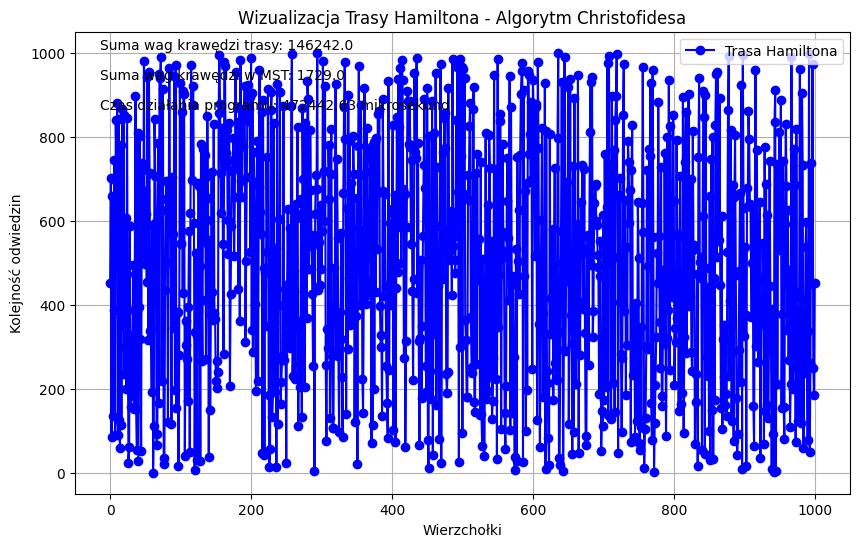

In [6]:
import matplotlib.pyplot as plt

def read_results(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        path = list(map(int, lines[0].split()[1:]))  # Odczytaj ścieżkę z 1-bazowymi indeksami
        total_cost = float(lines[1].split()[-1])    # Odczytaj całkowity koszt trasy
        mst_cost = float(lines[2].split()[-1])      # Odczytaj całkowity koszt MST
        duration = float(lines[3].split()[-2])      # Odczytaj czas wykonania jako float
    return path, total_cost, mst_cost, duration

def plot_results(path, total_cost, mst_cost, duration):
    plt.figure(figsize=(10, 6))

    # Tworzenie wykresu
    plt.plot(path + [path[0]], marker='o', linestyle='-', color='b', label='Trasa Hamiltona')
    plt.title('Wizualizacja Trasy Hamiltona - Algorytm Christofidesa')
    plt.xlabel('Wierzchołki')
    plt.ylabel('Kolejność odwiedzin')
    plt.legend()

    # Dodanie tekstu z informacjami
    plt.figtext(0.15, 0.85, f'Suma wag krawędzi trasy: {total_cost}', fontsize=10)
    plt.figtext(0.15, 0.80, f'Suma wag krawędzi w MST: {mst_cost}', fontsize=10)
    plt.figtext(0.15, 0.75, f'Czas działania programu: {duration:.2f} mikrosekund', fontsize=10)

    # Wyświetlenie wykresu
    plt.grid(True)
    plt.savefig('results_visualization.png')  # Zapisanie wykresu do pliku
    plt.show()

def main():
    file_path = 'results.txt'
    path, total_cost, mst_cost, duration = read_results(file_path)
    plot_results(path, total_cost, mst_cost, duration)

if __name__ == "__main__":
    main()


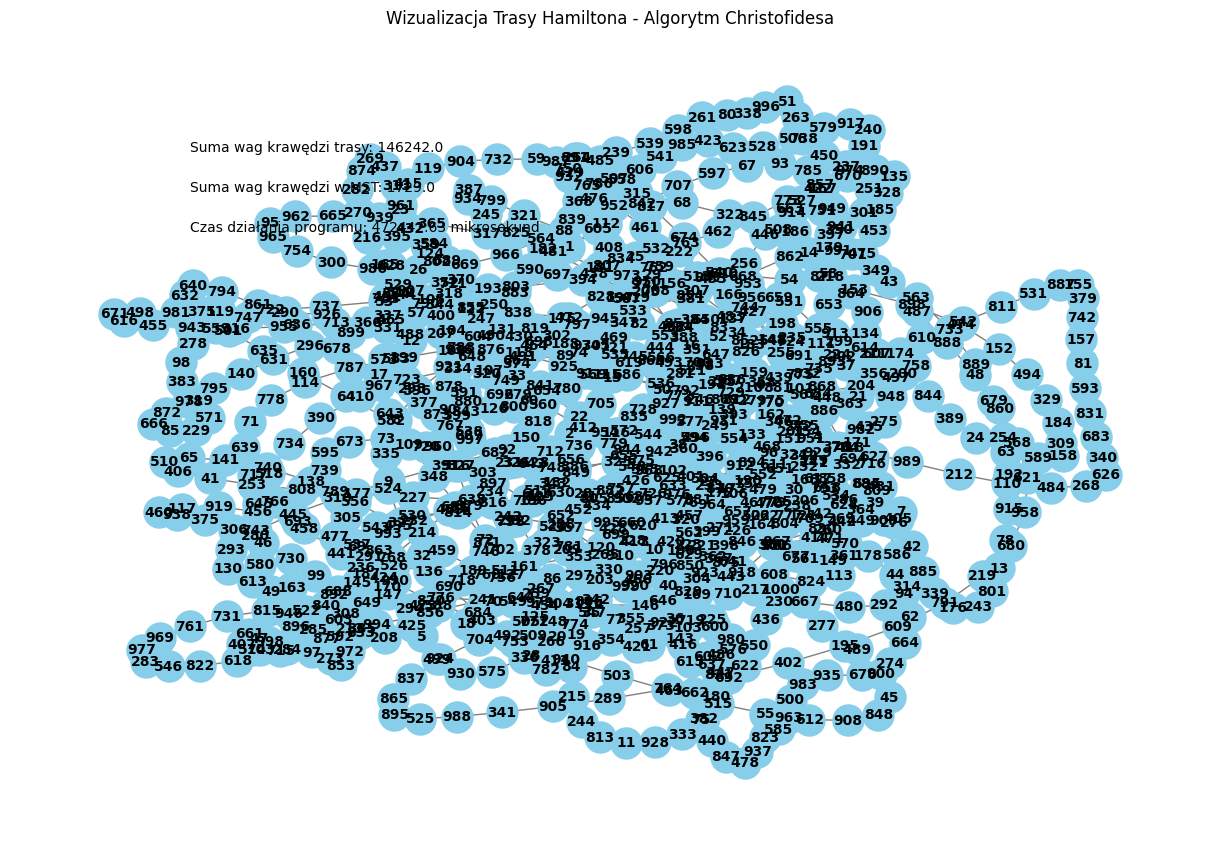

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def read_results(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        path = list(map(int, lines[0].split()[1:]))  # Odczytaj ścieżkę z 1-bazowymi indeksami
        total_cost = float(lines[1].split()[-1])    # Odczytaj całkowity koszt trasy
        mst_cost = float(lines[2].split()[-1])      # Odczytaj całkowity koszt MST
        duration = float(lines[3].split()[-2])      # Odczytaj czas wykonania jako float
    return path, total_cost, mst_cost, duration

def plot_results(path, total_cost, mst_cost, duration):
    G = nx.Graph()

    # Dodanie krawędzi na podstawie ścieżki
    edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    edges.append((path[-1], path[0]))  # Dodanie krawędzi powrotnej do początku
    G.add_edges_from(edges)

    pos = nx.spring_layout(G)

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')

    # Dodanie tytułu i tekstu z informacjami
    plt.title('Wizualizacja Trasy Hamiltona - Algorytm Christofidesa')
    plt.figtext(0.15, 0.85, f'Suma wag krawędzi trasy: {total_cost}', fontsize=10)
    plt.figtext(0.15, 0.80, f'Suma wag krawędzi w MST: {mst_cost}', fontsize=10)
    plt.figtext(0.15, 0.75, f'Czas działania programu: {duration:.2f} mikrosekund', fontsize=10)

    plt.savefig('results_visualization.png')  # Zapisanie wykresu do pliku
    plt.show()

def main():
    file_path = 'results.txt'
    path, total_cost, mst_cost, duration = read_results(file_path)
    plot_results(path, total_cost, mst_cost, duration)

if __name__ == "__main__":
    main()
